In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df_original = pd.read_csv('drive/MyDrive/Milestone2/WikiLarge_Train.csv')
df_original['re_tokened'] = pickle.load(open('drive/MyDrive/Milestone2/re_tokenized_lemma.pkl', 'rb'))
df_original['re_tokened2'] = df_original['re_tokened'].apply(lambda x: ' '.join(x))

df = df_original.sample(100000, random_state=42)
Train_X, Test_X, Train_Y, Test_Y = train_test_split(df['re_tokened2'],df['label'],test_size=0.2,random_state=42)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer(max_features=10000, lowercase=True, stop_words='english')

Train_X_Tfidf = Tfidf_vect.fit_transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [3]:
Train_X_Tfidf.shape, Test_X_Tfidf.shape

((80000, 10000), (20000, 10000))

# SVM with tfidf

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# SVM = svm.SVC(C=0.5, kernel='linear', degree=3, gamma='auto')
# SVM.fit(Train_X_Tfidf,Train_Y)

# predictions_SVM = SVM.predict(Test_X_Tfidf)
# svm_acc = accuracy_score(Test_Y, predictions_SVM)*100
# svm_f1 = f1_score(Test_Y, predictions_SVM)*100
# svm_acc, svm_f1

(65.265, 64.89463843549447)

In [ ]:
# pickle.dump(SVM, open('drive/MyDrive/Milestone2/trained_models/svm_tfidf_sampled.pkl', 'wb'))

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,), random_state=42, max_iter=300)
mlp.fit(Train_X_Tfidf, Train_Y)
mlp_preds = mlp.predict(Test_X_Tfidf)
mlp_acc = accuracy_score(Test_Y, mlp_preds)*100
mlp_f1 = f1_score(Test_Y, mlp_preds)*100
mlp_acc, mlp_f1

(63.77, 63.77724455108977)

In [ ]:
pickle.dump(mlp, open('drive/MyDrive/Milestone2/trained_models/mlp_tfidf.pkl', 'wb'))

In [ ]:
reloaded_mlp = pickle.load(open('drive/MyDrive/Milestone2/trained_models/mlp_tfidf.pkl', 'rb'))

In [ ]:
# Test_X_Tfidf

In [ ]:
mlp_preds = reloaded_mlp.predict(Test_X_Tfidf)

In [ ]:
mlp_acc = accuracy_score(Test_Y, mlp_preds)*100
mlp_f1 = f1_score(Test_Y, mlp_preds)*100
mlp_acc, mlp_f1

(63.77, 63.77724455108977)

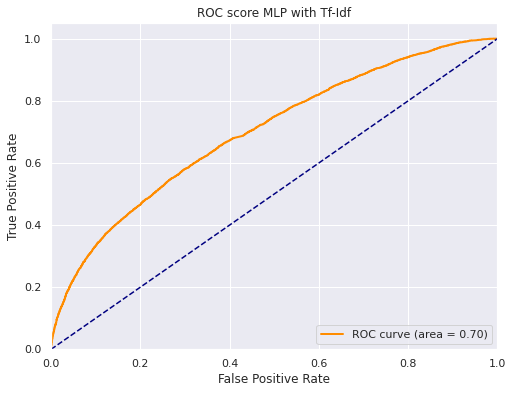

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_score = reloaded_mlp.predict_proba(Test_X_Tfidf)
mlp_fpr, mlp_tpr, thresholds = roc_curve(Test_Y, y_score[:,1], pos_label=1)
area = auc(mlp_fpr, mlp_tpr)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(8,6))
lw = 2
plt.plot(mlp_fpr, mlp_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC score MLP with Tf-Idf')
plt.legend(loc="lower right")
plt.savefig('ROC_MLP_tfidf.jpg')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap= True,
 max_depth=70,
 max_features='auto',
 min_samples_leaf=4,
 min_samples_split=10,
 n_estimators=800)

rf.fit(Train_X_Tfidf, Train_Y)
rf_preds = rf.predict(Test_X_Tfidf)
rf_acc = accuracy_score(Test_Y, rf_preds)
rf_f1 = f1_score(Test_Y, rf_preds)
rf_acc, rf_f1

(0.6498, 0.6207904710341093)

In [4]:
import pickle

# pickle.dump(rf, open('drive/MyDrive/Milestone2/trained_models/rf_tfidf_10w.pkl', 'wb'))

reloaded_rf = pickle.load(open('drive/MyDrive/Milestone2/trained_models/rf_tfidf_10w.pkl', 'rb'))

In [7]:
len(y_score)

20000

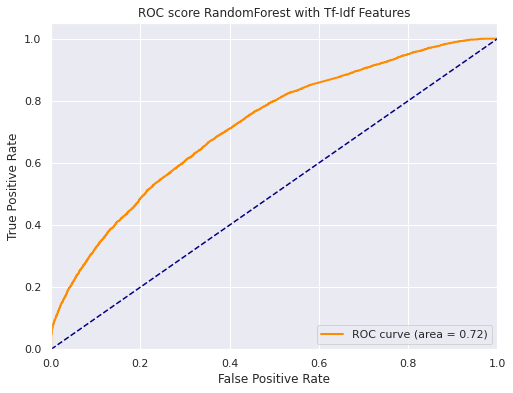

In [5]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_score = reloaded_rf.predict_proba(Test_X_Tfidf)
rf_fpr, rf_tpr, thresholds = roc_curve(Test_Y, y_score[:,1], pos_label=1)
area = auc(rf_fpr, rf_tpr)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(8,6))
lw = 2
plt.plot(rf_fpr, rf_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC score RandomForest with Tf-Idf Features')
plt.legend(loc="lower right")
plt.savefig('ROC_RandomForest_tfidf.jpg')

In [6]:
roc_df = pd.DataFrame([rf_fpr, rf_tpr]).T
roc_df.columns = ['rf_fpr', 'rf_tpr']
roc_df['feat'] = 'tfidf'
roc_df.shape

(8532, 3)

In [8]:
roc_df.to_csv('roc_tfidf_100k.csv')

In [ ]:
reloaded_rf = pickle.load(open('drive/MyDrive/Milestone2/trained_models/rf_tfidf_10w.pkl', 'rb'))

In [ ]:
rf_preds = reloaded_rf.predict(Test_X_Tfidf)
rf_acc = accuracy_score(Test_Y, rf_preds)*100
rf_f1 = f1_score(Test_Y, rf_preds)*100
rf_acc, rf_f1

(64.98, 62.079047103410936)

# Summary

In [ ]:
score_df = pd.DataFrame([[mlp_acc, rf_acc],[mlp_f1, rf_f1]]).T
score_df.columns=['accuracy', 'f1 score']
score_df['model'] = ['MLP','RandomForest']
score_df.to_csv('scores_10w_tfidf.csv')
score_df

,accuracy,f1 score,model
0,63.77,63.777245,MLP
1,64.98,62.079047,RandomForest
